In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file
data=pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
#finding if there is any null value
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [4]:
#getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


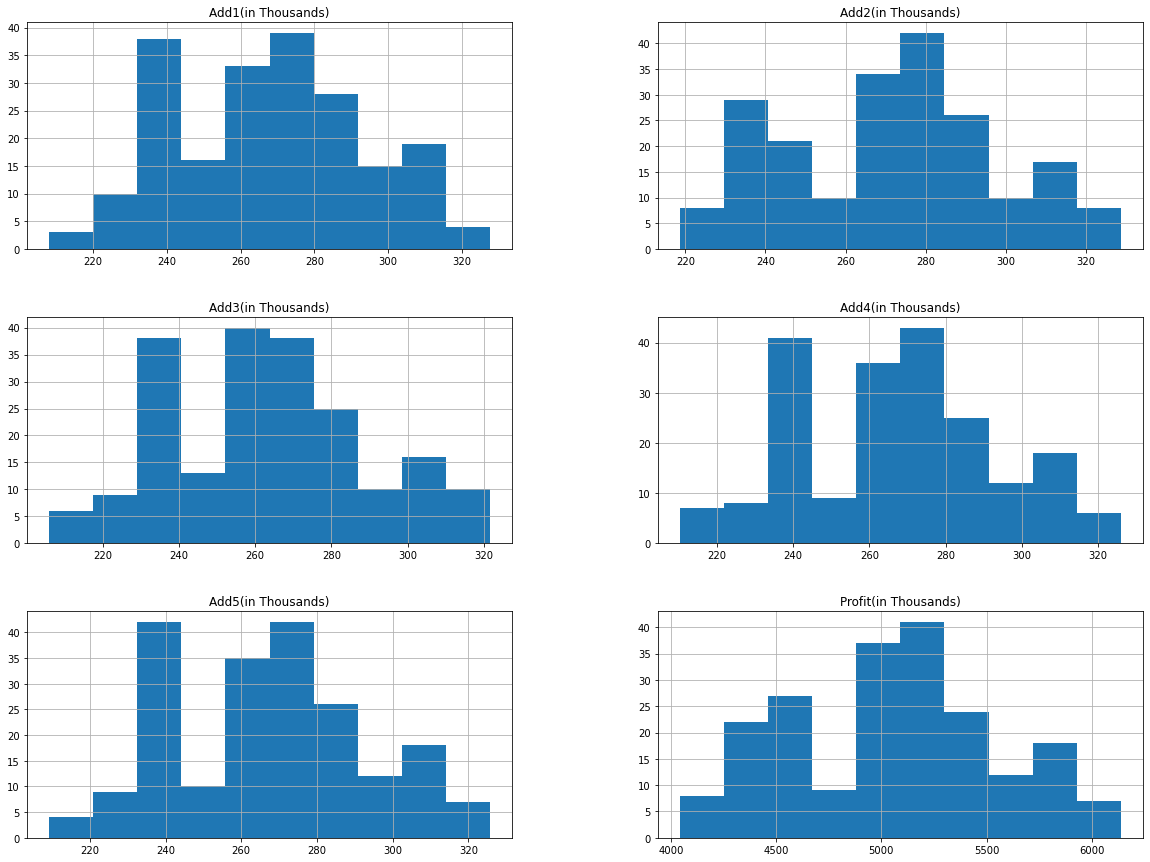

In [5]:
#histogram of the data
freqgraph=data.select_dtypes(include=['int32','float64'])

#giving figure size
freqgraph.hist(figsize=(20,15))
plt.show()

In [6]:
#describing the data
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

In [7]:
#finding correlation
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

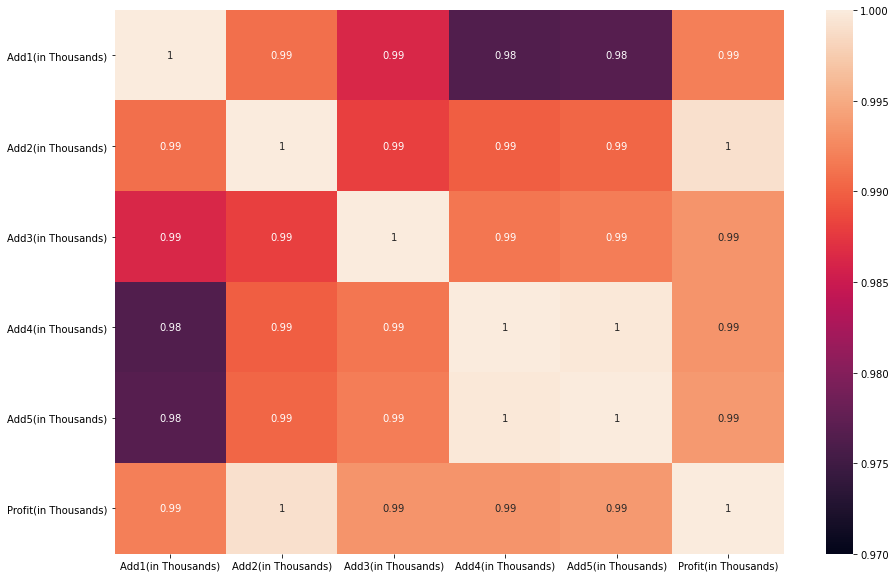

In [8]:
#representing correlation using heatmap
corrmatrix=data.corr()
#giving figure size
plt.subplots(figsize=(15,10))

sns.heatmap(corrmatrix,vmin=.97,annot=True)

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

### Splitting data into independent and dependent variables

In [9]:
#y-dependent variable
y=data['Profit(in Thousands)']

#x-independent variable
#dropping dependent variable and date
x=data.drop(['Profit(in Thousands)','Date'],axis=1)

### Splitting data into train and test set

In [10]:
#importing train_test_split from model_selection class in scikit learn
from sklearn.model_selection import train_test_split

#defining x_train,x_test,y_train,y_test to split data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)
#random_state helps to produce the same results across a different run
#test_size is the size of data used for testing(here taken 30%)

### Building linear regression model

In [11]:
#importing linear_model from scikit learn
from sklearn import linear_model

#finding linear regression and assigning to lr
lr=linear_model.LinearRegression()

#creating model
model=lr.fit(x_train,y_train)

#predicting using created model
predictions=model.predict(x_test)

In [12]:
#printing predictions
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


### Evaluating the model

In [13]:
#importing mean_squared_error from metrics class in scikit learn
from sklearn.metrics import mean_squared_error

#printing mean squared error
print('Mean Squared Error is: ',mean_squared_error(y_test,predictions))

Mean Squared Error is:  1.4542368833593551e-24


In [14]:
#finding Root mean squared error
rmse=np.sqrt(mean_squared_error(y_test,predictions))
rmse

1.205917444669972e-12

In [15]:
#finding r2 score

#importing r2_score from metrics class in scikit learn
from sklearn.metrics import r2_score

#printing r2 score
print('R squared value is :',r2_score(y_test,predictions))

R squared value is : 1.0


Mean Squared Error is 1.4542368833593551e-24 which when rounded is equal to 0.
Rsqaure is 1,which indicates perfect fit.
So the model is efficient and perfect.

In [16]:
#finding efficiency
(sum(predictions)/sum(y_test))*100

99.99999999999997

In [17]:
#coefficient of model
model.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

In [18]:
#intercept of model
model.intercept_

4.547473508864641e-12

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.


## Add1(in Thousands) 290


## Add2(in Thousands) 312


## Add3(in Thousands) 309


## Add4(in Thousands) 298


## Add5(in Thousands) 320

In [19]:
#giving the sample values
sample=[[290,312,309,298,320]]

#predicting the profit
profit=model.predict(sample)
profit

array([5820.06])